# Noca Nocca

In [1]:
from games.nocca_nocca.nocca_nocca import NoccaNocca
from agents.agent_random import RandomAgent
from agents.minimax import MiniMax   
from agents.mcts import MonteCarloTreeSearch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Run(game, agents, verbose = True, n=10):
    categories = ["Ganados", "Empatados", "Perdidos"]
    results = {
        k: [0, 0, 0] for k, _ in agents.items()
    }

    for i in range(n):
        game.reset()
        if verbose:
            print(f"Initial Agent: {game.agent_selection} ({agents[game.agent_selection][0]})")
        while not game.game_over():
            game.render()
            action = agents[game.agent_selection][1].action()
            if verbose:
                print(f"Turn {game.steps} -- Agent {game.agent_selection} ({agents[game.agent_selection][0]}) plays action {action}")
            game.step(action=action)
        game.render()
        if game.truncated():
            if verbose:
                print("Game was truncated")
        for agent in agents:
            if verbose:
                print(f"Reward agent {agent} ({agents[agent][0]}): {game.reward(agent)}")

        winner = game.check_for_winner()
        if verbose:
            if winner is None:
                print(f"Drawn game")
            else:
                print(f"The winner is: {winner} ({agents[winner][0]})")

        for agent in agents:
            if winner is None:
                results[agent][1] += 1
            elif winner == agent:
                results[agent][0] += 1
            else:
                results[agent][2] += 1

    _, ax = plt.subplots()
    x = np.arange(len(categories))
    bar_width = 0.35
    agent_ids = list(agents)

    ax.bar(x - bar_width/2, results[agent_ids[0]], bar_width, label=agents[agent_ids[0]][0])
    ax.bar(x + bar_width/2, results[agent_ids[1]], bar_width, label=agents[agent_ids[1]][0])

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel('Cantidad')
    ax.set_title(f"Comparación de resultados sobre {n} juegos")
    ax.legend()
    ax.set_ylim(0, max(results[agent_ids[0]] + results[agent_ids[1]]) * 1.1)

    plt.show()

In [3]:
game = NoccaNocca(max_steps=150, initial_player=0)

### Función de evaluación (opponent_distance - player_distance) / max_difference

En estas primeras pruebas se utiliza la función eval del juego nocca nocca que cálcula la distancia mínima del jugador y del oponente a la meta retornando la diferencia normalizada.

#### Random vs Minimax depth=3

Initial Agent: Black (Random)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (Random) plays action 46
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MiniMax_depth_3) plays action 264
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ 1__ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (Random) plays action 51
0: ___ ___ ___ ___ ___ 
1: ___ ___ 00_ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ 1__ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White (MiniMax_depth_3) plays actio

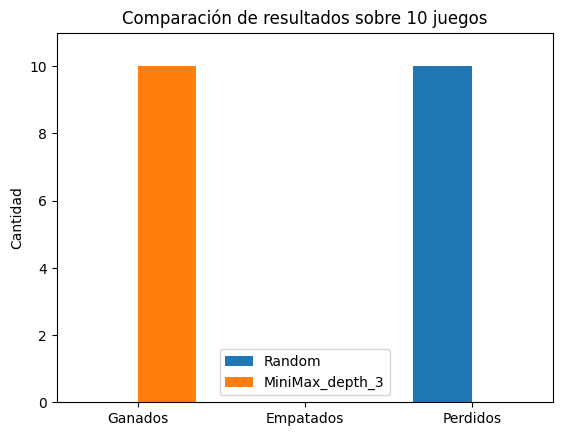

In [5]:
Run(game, {
    game.agents[0]: ("Random", RandomAgent(game=game, agent=game.agents[0])),
    game.agents[1]: ("MiniMax_depth_3", MiniMax(game=game, agent=game.agents[1], depth=3)),
})

#### Random vs MCTS, max_depth=5

Initial Agent: Black (Random)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (Random) plays action 57
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MCTS_maxdepth_5) plays action 256
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (Random) plays action 101
0: ___ ___ ___ ___ ___ 
1: 0__ 00_ ___ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White (MCTS_maxdepth_5) plays acti

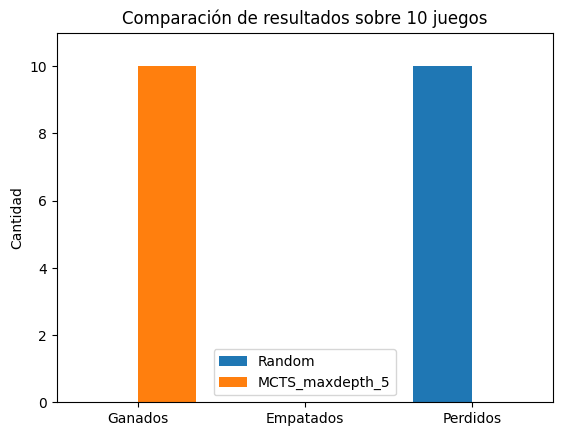

In [4]:
Run(game, {
    game.agents[0]: ("Random", RandomAgent(game=game, agent=game.agents[0])),
    game.agents[1]: ("MCTS_maxdepth_5", MonteCarloTreeSearch(game=game, agent=game.agents[1], max_depth=5)),
})

#### Minimax, depth=1 vs Minimax, depth=3

Initial Agent: Black (MiniMax_depth_1)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MiniMax_depth_1) plays action 54
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MiniMax_depth_3) plays action 255
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ ___ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MiniMax_depth_1) plays action 100
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ 0__ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ ___ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White (

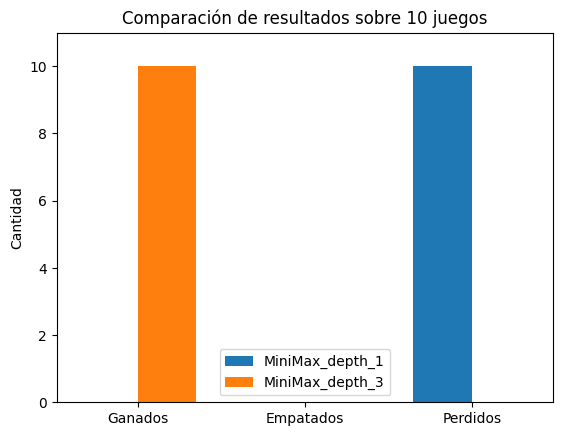

In [6]:
Run(game, {
    game.agents[0]: ("MiniMax_depth_1", MiniMax(game=game, agent=game.agents[0], depth=1)),
    game.agents[1]: ("MiniMax_depth_3", MiniMax(game=game, agent=game.agents[1], depth=3)),
})

#### MCTS, max_depth=5 vs MCTS, max_depth=5

Initial Agent: Black (MCTS_maxdepth_5_1)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_5_1) plays action 46
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MCTS_maxdepth_5_2) plays action 269
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_5_1) plays action 92
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: 0__ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent 

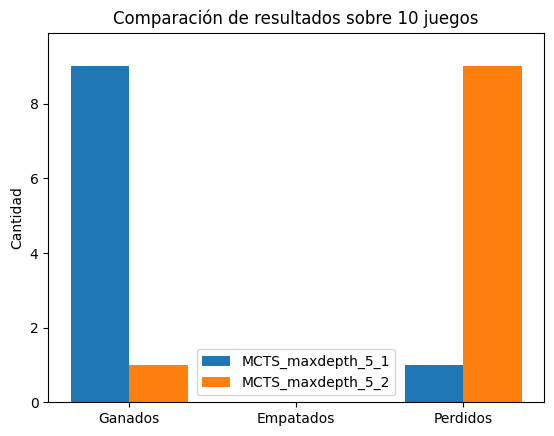

In [9]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_5_1", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=5)),
    game.agents[1]: ("MCTS_maxdepth_5_2", MonteCarloTreeSearch(game=game, agent=game.agents[1], max_depth=5)),
})

El agente MCTS parece ser sensible a la posición en la que arranca la partida.

#### MCTS, max_depth=5 vs MinMax, depth=3

Initial Agent: Black (MCTS_maxdepth_5)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_5) plays action 57
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MiniMax_depth_3) plays action 271
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ 1__ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_5) plays action 100
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ 0__ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ 1__ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White (

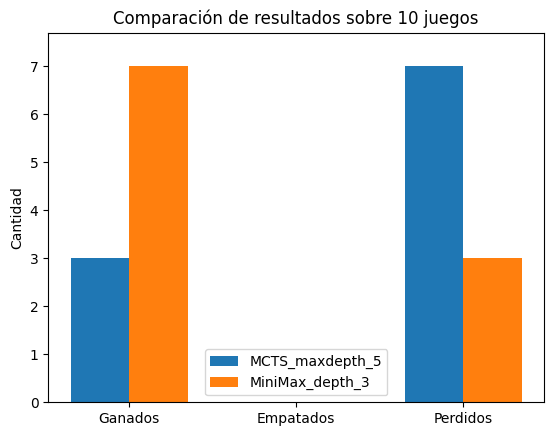

In [10]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_5", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=5)),
    game.agents[1]: ("MiniMax_depth_3", MiniMax(game=game, agent=game.agents[1], depth=3)),
})

#### MinMax, depth=3 vs MCTS, max_depth=5

Initial Agent: Black (MiniMax_depth_3)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MiniMax_depth_3) plays action 60
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MCTS_maxdepth_5) plays action 272
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ 1__ 
6: 1__ 1__ 1__ 1__ ___ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MiniMax_depth_3) plays action 89
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ 0__ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ 1__ 
6: 1__ 1__ 1__ 1__ ___ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White (M

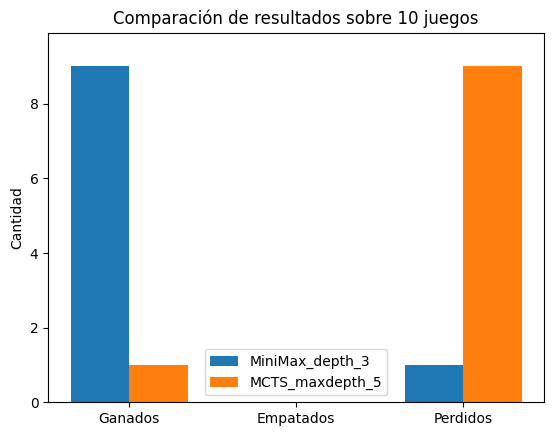

In [12]:
Run(game, {
    game.agents[0]: ("MiniMax_depth_3", MiniMax(game=game, agent=game.agents[0], depth=3)),
    game.agents[1]: ("MCTS_maxdepth_5", MonteCarloTreeSearch(game=game, agent=game.agents[1], max_depth=5)),
    
})

### Función de evaluacion ponderada entre distancia y piezas bloqueadas

Se implementó otra función de evaluación eval_with_blocked en el juego nocca nocca que pondera el término de la distancia antes descripto con otro término que considera las piezas bloqueadas, (blocked_by_player - blocked_by_opponent) / max_blocked.

#### MCTS, max_depth=10 vs MCTS, max_depth=10, eval=eval_with_blocked

Initial Agent: Black (MCTS_maxdepth_10)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_10) plays action 76
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ ___ 
2: ___ ___ ___ 0__ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MCTS_maxdepth_10_blocked) plays action 255
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ ___ 
2: ___ ___ ___ 0__ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ ___ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_10) plays action 110
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ ___ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ 0__ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ ___ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- A

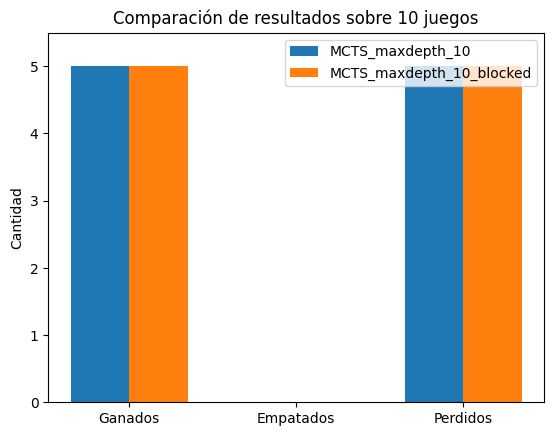

In [4]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_10", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=10, rollouts=20)),
    game.agents[1]: ("MCTS_maxdepth_10_blocked", MonteCarloTreeSearch(game=game, agent=game.agents[1], max_depth=10, rollouts=20, eval_name='eval_with_blocked')),
})

#### MCTS, max_depth=10, eval=eval_with_blocked vs MCTS, max_depth=10

Initial Agent: Black (MCTS_maxdepth_10_blocked)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_10_blocked) plays action 54
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MCTS_maxdepth_10) plays action 264
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ 1__ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_10_blocked) plays action 102
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ 0__ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ 1__ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ 

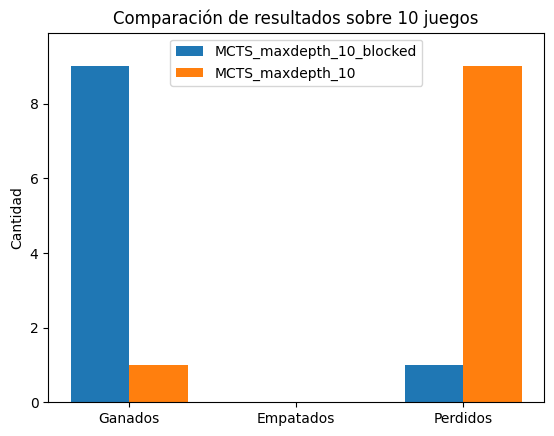

In [5]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_10_blocked", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=10, rollouts=20, eval_name='eval_with_blocked')),
    game.agents[1]: ("MCTS_maxdepth_10", MonteCarloTreeSearch(game=game, agent=game.agents[1], max_depth=10, rollouts=20)),
    
})

#### MCTS, max_depth=10 vs MCTS, max_depth=5, eval=eval_with_blocked

Initial Agent: Black (MCTS_maxdepth_10)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_10) plays action 41
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: 0__ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MCTS_maxdepth_5_blocked) plays action 240
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: 0__ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: 1__ ___ ___ ___ ___ 
6: ___ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_10) plays action 86
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ 0__ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: 1__ ___ ___ ___ ___ 
6: ___ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Age

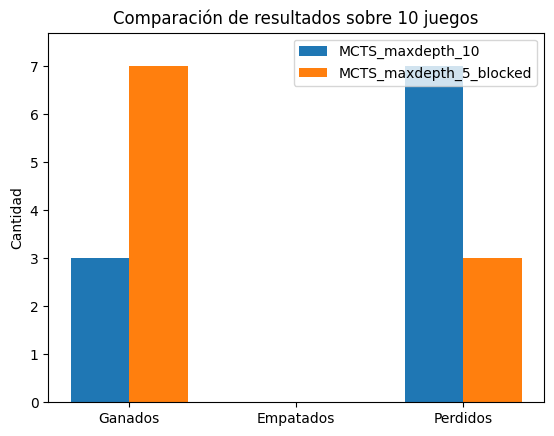

In [6]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_10", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=10)),
    game.agents[1]: ("MCTS_maxdepth_5_blocked", MonteCarloTreeSearch(game=game, agent=game.agents[1], max_depth=5, eval_name='eval_with_blocked')),
})

#### MCTS, max_depth=5, eval=eval_with_blocked vs MCTS, max_depth=10

Initial Agent: Black (MCTS_maxdepth_5_blocked)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_5_blocked) plays action 46
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MCTS_maxdepth_10) plays action 264
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ 1__ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_5_blocked) plays action 92
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: 0__ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ 1__ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 

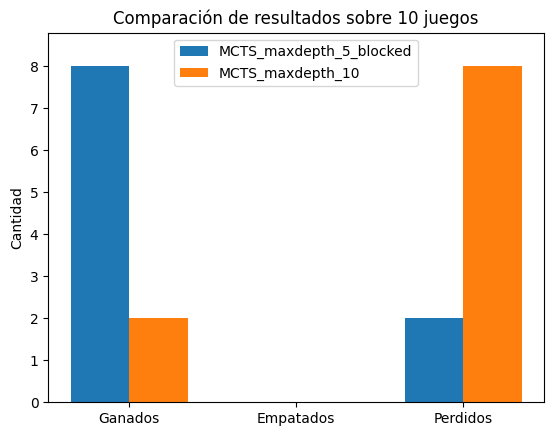

In [7]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_5_blocked", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=5, eval_name='eval_with_blocked')),
    game.agents[1]: ("MCTS_maxdepth_10", MonteCarloTreeSearch(game=game, agent=game.agents[1], max_depth=10)),
    
})

#### Minimax, depth=1, eval=eval_with_blocked vs Minimax, depth=3

Initial Agent: Black (MiniMax_depth_1_blocked)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MiniMax_depth_1_blocked) plays action 41
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: 0__ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MiniMax_depth_3) plays action 264
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: 0__ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ 1__ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MiniMax_depth_1_blocked) plays action 86
0: ___ ___ ___ ___ ___ 
1: ___ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ 0__ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ 1__ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 


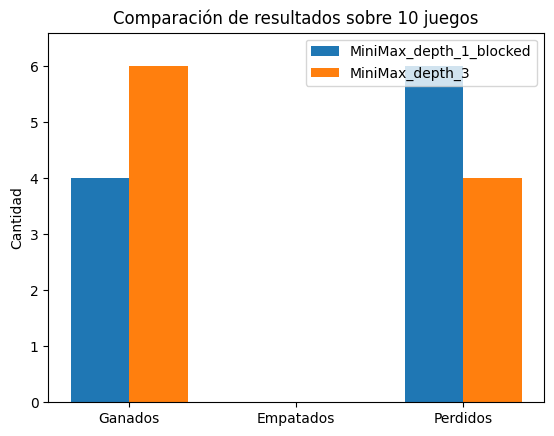

In [8]:
Run(game, {
    game.agents[0]: ("MiniMax_depth_1_blocked", MiniMax(game=game, agent=game.agents[0], depth=1, eval_name="eval_with_blocked")),
    game.agents[1]: ("MiniMax_depth_3", MiniMax(game=game, agent=game.agents[1], depth=3)),
})

#### Minimax, depth=3 vs Minimax, depth=1, eval=eval_with_blocked

Initial Agent: Black (MiniMax_depth_3)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MiniMax_depth_3) plays action 60
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MiniMax_depth_1_blocked) plays action 261
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ 1__ ___ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MiniMax_depth_3) plays action 89
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ 0__ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ 1__ ___ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent 

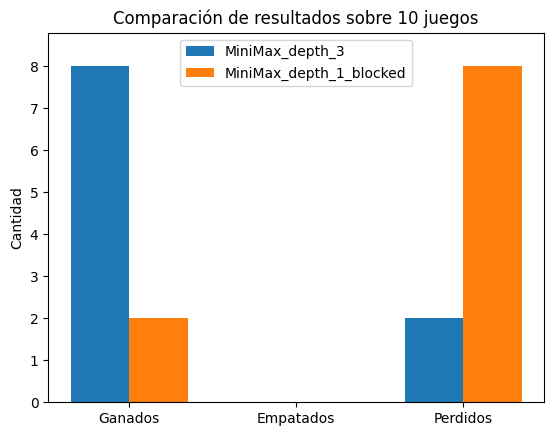

In [9]:
Run(game, {
    game.agents[0]: ("MiniMax_depth_3", MiniMax(game=game, agent=game.agents[0], depth=3)),
    game.agents[1]: ("MiniMax_depth_1_blocked", MiniMax(game=game, agent=game.agents[1], depth=1, eval_name="eval_with_blocked")),
})